In [4]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm  

In [9]:
table1=pd.read_csv("Bristol Quality of Life Survey 2021 Indicators.csv") 
table2=pd.read_csv("quality-of-life-2021-22-citywide-trend.csv") 
merge_table=pd.merge(table1,table2,on='Indicator Reference Number')

In [10]:
print(merge_table.shape[0])
print(merge_table.head())

815
  Indicator Reference Number  \
0                  IQOL17001   
1                  IQOL17001   
2                  IQOL17001   
3                  IQOL17001   
4                  IQOL17001   

                                        Formal Title  \
0  % respondents "very satisfied" or "fairly sati...   
1  % respondents "very satisfied" or "fairly sati...   
2  % respondents "very satisfied" or "fairly sati...   
3  % respondents "very satisfied" or "fairly sati...   
4  % respondents "very satisfied" or "fairly sati...   

                          Public Title Constituent Questions  \
0  \n% satisfied with their local area                Q17001   
1  \n% satisfied with their local area                Q17001   
2  \n% satisfied with their local area                Q17001   
3  \n% satisfied with their local area                Q17001   
4  \n% satisfied with their local area                Q17001   

                               Method of Calculation              Theme2  \
0  Nu

In [11]:
df2=merge_table[["Indicator Reference Number","Theme","Year","Statistic","Polarity (high is…)"]]
df2['Year'] = df2['Year'].astype(str)
df2.loc[df2['Polarity (high is…)'] == 'bad', 'Statistic'] = -df2['Statistic']
df2.loc[df2['Polarity (high is…)'] == 'neutral', 'Statistic'] = 0
df3 = pd.pivot_table(df2, values='Statistic', index='Year', columns='Theme', aggfunc='mean', fill_value=0)

6
Theme  Community & Living  Council & Democracy  Crime & Safety  \
Year                                                             
2015            21.992789             5.245620        4.933222   
2017            15.518691             1.531118        1.095594   
2018            10.632942            -2.924429       -0.606601   
2019            13.562685             1.479223        0.402803   
2020            10.079208             8.061445       -0.223795   
2021             9.076316             4.920000       -2.182353   

Theme  Culture & Leisure    Economy  Education & Skills  Health & Wellbeing  \
Year                                                                          
2015           61.295152 -11.647462           25.655987           16.232351   
2017           47.049554  -3.017597           32.458143           12.676087   
2018           39.663130  -2.838525           29.218301            7.495333   
2019           40.994512  -2.261995           28.506790           14.29347

C:\Users\Cathy\AppData\Local\Temp\ipykernel_42592\3217586586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['Year'].astype(str)


In [12]:
data2 = pd.read_excel('air-quality-data-continuous (1).xlsx')

In [15]:
data2['Date Time'] = pd.to_datetime(data2['Date Time'])
data2 = data2.assign(Year=data2['Date Time'].dt.year)

In [23]:
df5=data2[['Year','NOx','PM2.5','O3']]
df5['Year'] = df5['Year'].astype(str)
df5['Year'] = df5['Year'].str.split('.').str.get(0)

C:\Users\Cathy\AppData\Local\Temp\ipykernel_42592\3521903210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Year'] = df5['Year'].astype(str)
C:\Users\Cathy\AppData\Local\Temp\ipykernel_42592\3521903210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['Year'] = df5['Year'].str.split('.').str.get(0)


In [24]:
df6 = df5.groupby('Year').mean()
print(df6)

             NOx      PM2.5         O3
Year                                  
1993  134.690791        NaN  30.869126
1994  115.606960        NaN  37.497105
1995  120.740995        NaN  38.958680
1996  111.303642        NaN  34.119052
1997  125.240130        NaN  32.076880
1998  113.669618        NaN  38.495375
1999  111.305079        NaN  42.627125
2000   98.243909        NaN  38.374341
2001   74.620388        NaN  37.723482
2002  110.577424        NaN  37.784142
2003  174.628789        NaN  39.979355
2004  140.741392        NaN  40.459710
2005  140.698535        NaN  45.307406
2006  137.922377        NaN  43.351882
2007  132.442614        NaN  42.425836
2008  124.936303  12.848855  43.589984
2009  124.452504  13.482877  43.560405
2010  127.701317  14.015519  39.735940
2011  115.830495  14.731546  44.947264
2012  126.377956  13.386341  43.041551
2013  125.348789  12.600272  43.645969
2014  116.900159  13.042483  44.235101
2015  117.591395  10.178087  44.582670
2016   87.597877  11.4428

In [25]:
merge_table2=pd.merge(df3,df6,on='Year')
print(merge_table2)

      Community & Living  Council & Democracy  Crime & Safety  \
Year                                                            
2015           21.992789             5.245620        4.933222   
2017           15.518691             1.531118        1.095594   
2018           10.632942            -2.924429       -0.606601   
2019           13.562685             1.479223        0.402803   
2020           10.079208             8.061445       -0.223795   
2021            9.076316             4.920000       -2.182353   

      Culture & Leisure    Economy  Education & Skills  Health & Wellbeing  \
Year                                                                         
2015          61.295152 -11.647462           25.655987           16.232351   
2017          47.049554  -3.017597           32.458143           12.676087   
2018          39.663130  -2.838525           29.218301            7.495333   
2019          40.994512  -2.261995           28.506790           14.293473   
2020       

In [26]:
from sklearn.preprocessing import MinMaxScaler
columns = ['Community & Living','Council & Democracy','Crime & Safety','Culture & Leisure','Economy','Education & Skills','Health & Wellbeing','Housing','Sustainability & Environment','Transport','NOx','PM2.5','O3']
scaler = MinMaxScaler()
merge_table2[columns] = scaler.fit_transform(merge_table2[columns])

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

corr = merge_table2.corr()
print(corr)

                              Community & Living  Council & Democracy  \
Community & Living                      1.000000             0.077826   
Council & Democracy                     0.077826             1.000000   
Crime & Safety                          0.974339             0.150280   
Culture & Leisure                       0.835807            -0.122724   
Economy                                -0.880856             0.380196   
Education & Skills                     -0.540308             0.059569   
Health & Wellbeing                      0.755164             0.483324   
Housing                                 0.693432             0.264221   
Sustainability & Environment            0.873384            -0.343125   
Transport                               0.816719             0.590153   
NOx                                     0.928481            -0.030980   
PM2.5                                  -0.387591            -0.525314   
O3                                     -0.759674   

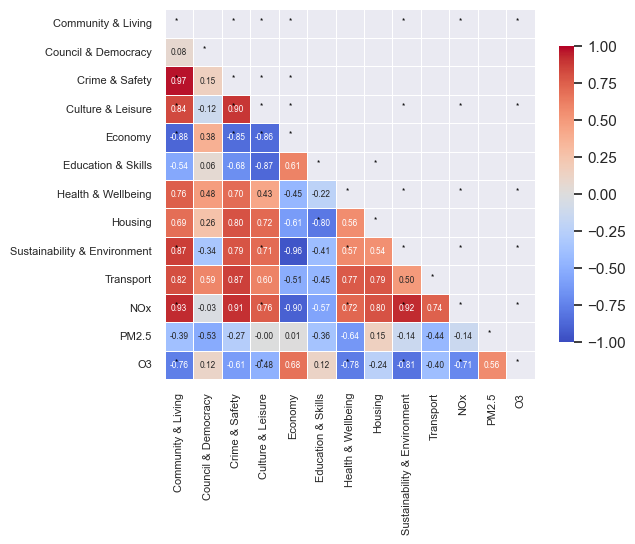

In [29]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

# Spearman
corr = merge_table2.corr()
corr_spearman, p = spearmanr(merge_table2)

alpha = 0.05

star_matrix = np.empty_like(corr_spearman, dtype=str)
star_matrix.fill("")

for i in range(corr_spearman.shape[0]):
    for j in range(corr_spearman.shape[1]):
        if p[i, j] < alpha:
            star_matrix[i, j] = "*"

mask = np.triu(np.ones_like(corr, dtype=bool))
ax=sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, fmt=".2f",
            cbar_kws={"shrink": .8}, square=True, linewidths=.5,
            center=0, vmin=-1, vmax=1, annot_kws={"size": 6})

for i in range(corr_spearman.shape[0]):
    for j in range(corr_spearman.shape[1]):
        if star_matrix[i, j] == "*":
            plt.text(j+0.4, i+0.4, star_matrix[i, j], ha="center", va="center",
                     color="black", fontsize=6)

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 8)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 8)
            
plt.show()
